In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys; sys.path.insert(0, os.path.abspath('../'))
import btom as bt
import scipy.stats as st
import ternary

In [122]:
aa = bt.utils.StanModelFactory.load_builtin('test-prior4.stan').model
gm = bt.utils.StanModelFactory.load_builtin('ginibre-prior.stan').model
#tm = bt.utils.StanModelFactory.load_builtin('test-prior.stan').model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_232e82c5ec4412708a3f5a9e1f06695b NOW.


In [136]:
fit = aa.sampling({'D':7,'s':.1})
rho = fit['rho_real'] + 1j * fit['rho_imag']
np.sum(rho[(np.s_[:],) + np.diag_indices(2)],axis=-1)

/home/ihincks/.miniconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


array([0.2996348 +0.j, 0.31618669+0.j, 0.27793306+0.j, ...,
       0.22108855+0.j, 0.39866141+0.j, 0.32033016+0.j])

In [137]:
fit

Inference for Stan model: anon_model_232e82c5ec4412708a3f5a9e1f06695b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
X_diag_unc[0]      -0.69  5.0e-3   0.32  -1.36   -0.9  -0.68  -0.47   -0.1   4000    1.0
X_diag_unc[1]      -0.75  5.3e-3   0.34  -1.46  -0.97  -0.74  -0.52  -0.13   4000    1.0
X_diag_unc[2]      -0.86  6.0e-3   0.38  -1.63  -1.11  -0.85   -0.6  -0.15   4000    1.0
X_diag_unc[3]      -1.04  6.7e-3   0.42   -1.9  -1.31  -1.02  -0.75   -0.3   4000    1.0
X_diag_unc[4]       -1.4  9.0e-3   0.57  -2.65  -1.75  -1.36   -1.0   -0.4   4000    1.0
X_diag_unc[5]      -2.31    0.02   1.01  -4.89   -2.8  -2.15   -1.6  -0.83   2478    1.0
X_offdiag_unc[0] -8.0e-5  2.2e-3   0.14  -0.27   -0.1-4.3e-4   0.09   0.27   4000    1.0
X_offdiag_unc[1]  2.6e-3  2.2e-3   0.14  -0.27  -0.09 3.3e-3   0.09   0.27   4000    1.0
X_offdiag_

In [66]:
def scramble(a, axis=-1):
    """
    Return an array with the values of `a` independently shuffled along the
    given axis
    """
    b = np.random.random(a.shape)
    idx = np.argsort(b, axis=axis)
    shuffled = a[np.arange(a.shape[0])[:, None], idx]
    return shuffled

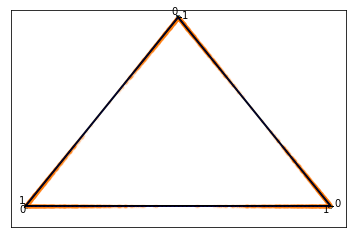

In [114]:
fig, tax = ternary.figure(scale=1)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")

fit = gm.sampling({'D':3,'K':1})
rho = fit['rho_real'] + 1j * fit['rho_imag']
svds = np.linalg.svd(rho, compute_uv=False)
tax.scatter(scramble(svds,axis=1), alpha=0.1, marker='.')

fit = aa.sampling({'D':3,'s':2*(1-3)+1})
rho = fit['rho_real'] + 1j * fit['rho_imag']
svds = np.linalg.svd(rho, compute_uv=False)
tax.scatter(scramble(svds,axis=1), alpha=0.1, marker='.')

tax.ticks(axis='lbr', linewidth=1)
tax.clear_matplotlib_ticks()

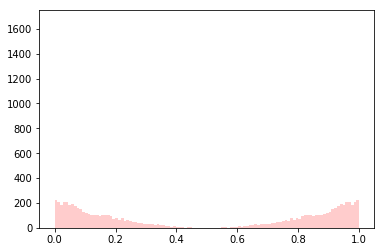

In [117]:
def plot_svd(model, D, K, s=1, c='r'):
    ff = model.sampling({'D':D,'K':K, 's':s})
    basis = bt.gell_mann_basis([D])[1:]
    x = np.real(basis.expand(ff['rho_real']+1j*ff['rho_imag'])).T
    x = np.linalg.svd(ff['rho_real']+1j*ff['rho_imag'], compute_uv=False).T
    for xx in x:
        plt.hist(xx, 50, alpha=0.2, facecolor=c)

plot_svd(aa, 3,6,s=2*(1-3)+1)
plot_svd(gm, 3,1, c='b')

In [52]:
gm = bt.utils.StanModelFactory.load_builtin('ginibre-prior.stan').model
tm = bt.utils.StanModelFactory.load_builtin('test-prior.stan').model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b85769e378881c4f8ddbf8a7d42bfb52 NOW.


In [17]:
from scipy.special import logit, expit

In [ ]:
np.sqrt()

In [19]:
expit(1.09)

0.7483817216070642

In [64]:
data = {'D': 5, 'K':2}
gf = gm.sampling(data)
tf = tm.sampling(data)

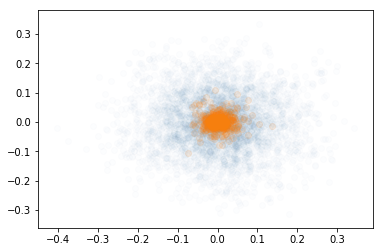

In [65]:
basis = bt.gell_mann_basis([data['D']])[1:]
x = np.real(basis.expand(gf['rho_real'] + 1j * gf['rho_imag'])).T
y = np.real(basis.expand(tf['rho_real'] + 1j * tf['rho_imag'])).T
plt.scatter(x[:,0], x[:,1], alpha=0.01)
plt.scatter(y[:,0], y[:,1], alpha=0.1)

In [66]:
tf['X_real'][0,...]

array([[ 0.02939918,  0.        ],
       [-0.59542684,  0.69885666],
       [-0.34267604, -0.13174695],
       [ 0.1263147 ,  0.0029276 ],
       [ 0.00258917, -0.06019876]])

In [67]:
tf['X_imag'][0,...]

array([[ 0.        ,  0.        ],
       [-0.01286646,  0.        ],
       [ 0.01879705,  0.00402152],
       [-0.03367464,  0.00438868],
       [-0.00484393, -0.01055861]])

In [68]:
tf['X_vec'][0,...]

array([ 0.02939918,  0.69885666, -0.59542684, -0.34267604, -0.13174695,
        0.1263147 ,  0.0029276 ,  0.00258917, -0.06019876, -0.01286646,
        0.01879705,  0.00402152, -0.03367464,  0.00438868, -0.00484393,
       -0.01055861])

In [69]:
tf

Inference for Stan model: anon_model_b85769e378881c4f8ddbf8a7d42bfb52.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
X_vec_diag[0]    -1.6e-3    0.02   1.05  -2.07   -0.7-6.5e-3   0.68    2.1   4000    1.0
X_vec_offdiag[0]    0.02    0.02    1.0  -1.94  -0.66   0.03   0.71    1.9   4000    1.0
X_vec_offdiag[1] -2.5e-3    0.02   0.96  -1.89  -0.64  -0.01   0.64   1.89   4000    1.0
X_vec_offdiag[2] -5.0e-3    0.02   0.96  -1.98  -0.64 6.1e-3   0.64   1.93   4000    1.0
X_vec_offdiag[3]    0.02    0.02   0.99  -1.94  -0.65   0.03   0.68   1.98   4000    1.0
X_vec_offdiag[4] -6.4e-3    0.02   0.96  -1.87  -0.66-4.6e-3   0.64   1.88   4000    1.0
X_vec_offdiag[5]  3.2e-3    0.02   0.99  -1.94  -0.66 7.1e-3   0.67   1.91   4000    1.0
X_vec_offdiag[6]    0.01    0.02   1.01  -1.97  -0.65 2.7e-3   0.69   2.02   4000    1.0
X_vec_offd